<a href="https://colab.research.google.com/github/proteus21/DATA-SCIENCE-STUDY/blob/main/Computer%20Vision/Yolo_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!git clone https://github.com/matzim95/ML-datasets

fatal: destination path 'ML-datasets' already exists and is not an empty directory.


In [3]:
import cv2
from google.colab.patches import cv2_imshow

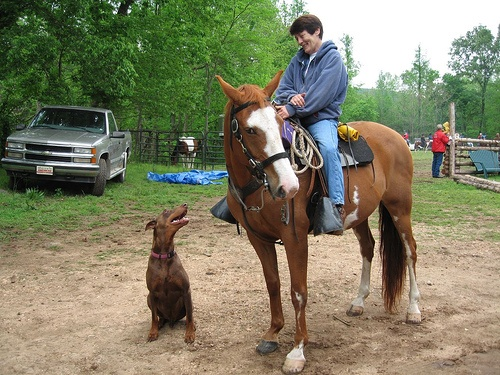

In [4]:
img = cv2.imread("ML-datasets/images/horse.jpg")
cv2_imshow(img)

# Wczytywanie gotowej sieci neuronowej

In [5]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [6]:
net = cv2.dnn.readNetFromDarknet("ML-datasets/networks/yolov3.cfg", "drive/My Drive/yolov3.weights")
layers = net.getLayerNames()
print(len(layers))
print(layers)

254
('conv_0', 'bn_0', 'leaky_1', 'conv_1', 'bn_1', 'leaky_2', 'conv_2', 'bn_2', 'leaky_3', 'conv_3', 'bn_3', 'leaky_4', 'shortcut_4', 'conv_5', 'bn_5', 'leaky_6', 'conv_6', 'bn_6', 'leaky_7', 'conv_7', 'bn_7', 'leaky_8', 'shortcut_8', 'conv_9', 'bn_9', 'leaky_10', 'conv_10', 'bn_10', 'leaky_11', 'shortcut_11', 'conv_12', 'bn_12', 'leaky_13', 'conv_13', 'bn_13', 'leaky_14', 'conv_14', 'bn_14', 'leaky_15', 'shortcut_15', 'conv_16', 'bn_16', 'leaky_17', 'conv_17', 'bn_17', 'leaky_18', 'shortcut_18', 'conv_19', 'bn_19', 'leaky_20', 'conv_20', 'bn_20', 'leaky_21', 'shortcut_21', 'conv_22', 'bn_22', 'leaky_23', 'conv_23', 'bn_23', 'leaky_24', 'shortcut_24', 'conv_25', 'bn_25', 'leaky_26', 'conv_26', 'bn_26', 'leaky_27', 'shortcut_27', 'conv_28', 'bn_28', 'leaky_29', 'conv_29', 'bn_29', 'leaky_30', 'shortcut_30', 'conv_31', 'bn_31', 'leaky_32', 'conv_32', 'bn_32', 'leaky_33', 'shortcut_33', 'conv_34', 'bn_34', 'leaky_35', 'conv_35', 'bn_35', 'leaky_36', 'shortcut_36', 'conv_37', 'bn_37', 'le

In [7]:
#warstwy niepolaczone
net.getUnconnectedOutLayers()
ln=[layers[i-1] for i in net.getUnconnectedOutLayers()]
ln

['yolo_82', 'yolo_94', 'yolo_106']

#Przygotowanie wejscia do sieci

In [8]:
blob=cv2.dnn.blobFromImage(img,1/255.0,(608,608), swapRB=True)

print(img.shape)
print(blob.shape)

(375, 500, 3)
(1, 3, 608, 608)


#Przejscie przez sieć

In [9]:
net.setInput(blob)
output=net.forward(ln)

In [10]:
print(len(output))

3


In [11]:
for out in output:
  print(out.shape)

(1083, 85)
(4332, 85)
(17328, 85)


In [12]:
print(output[0][0])

[1.53198615e-02 2.81313248e-02 1.89632773e-01 1.00327313e-01
 2.09262382e-11 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.000000

# Obróbka wyjscia

In [13]:
import numpy as np

boxes = []
confidences = []
classIDs = []
h, w = img.shape[:2]

for out in output:
  for detection in out:
    scores = detection[5:]
    classID = np.argmax(scores)
    confidence = scores[classID]
    if confidence > 0.7:
      box = detection[:4] * np.array([w,h,w,h])
      (centerX, centerY, width, height) = box.astype("int")
      x = int(centerX - width/2)
      y = int(centerY - height/2)
      boxes.append([x,y,int(width),int(height)])
      confidences.append(confidence)
      classIDs.append(classID)

print(len(boxes))

19


In [14]:
print(boxes[0], confidences[0], classIDs[0])

[269, 8, 79, 216] 0.9834874 0


#Rysowanie

In [15]:
colors=np.random.randint(0,255, size=(80,3))
colors

array([[129, 150,  11],
       [136, 230,  39],
       [151, 181,  21],
       [  5, 240, 108],
       [ 48,  98,  56],
       [199, 221, 160],
       [189,   5,  82],
       [135,  77, 239],
       [248, 242, 218],
       [225, 181, 127],
       [ 67, 229, 224],
       [ 55,  93,  27],
       [ 59, 117,   6],
       [ 55,  29, 189],
       [243, 125,  99],
       [176,   4,  94],
       [237, 222, 248],
       [ 64,   4, 129],
       [184, 165, 191],
       [172, 224, 185],
       [210, 224, 113],
       [ 12,  82, 193],
       [240,  99, 135],
       [ 55, 113, 252],
       [ 22, 164,  75],
       [154, 251, 156],
       [158, 135,  41],
       [ 93, 143, 144],
       [165, 232, 105],
       [ 74, 226, 121],
       [ 22, 166, 224],
       [ 19,   7, 197],
       [ 70, 158,  76],
       [220, 213, 176],
       [247,  99, 208],
       [165,  48,  39],
       [ 24, 243, 157],
       [ 10, 101, 173],
       [122,  47,  70],
       [ 82,  23, 237],
       [244, 254, 181],
       [189, 158

In [16]:
classes = open("ML-datasets/networks/coco.names").read().split("\n")
classes

['person',
 'bicycle',
 'car',
 'motorcycle',
 'airplane',
 'bus',
 'train',
 'truck',
 'boat',
 'traffic light',
 'fire hydrant',
 'stop sign',
 'parking meter',
 'bench',
 'bird',
 'cat',
 'dog',
 'horse',
 'sheep',
 'cow',
 'elephant',
 'bear',
 'zebra',
 'giraffe',
 'backpack',
 'umbrella',
 'handbag',
 'tie',
 'suitcase',
 'frisbee',
 'skis',
 'snowboard',
 'sports ball',
 'kite',
 'baseball bat',
 'baseball glove',
 'skateboard',
 'surfboard',
 'tennis racket',
 'bottle',
 'wine glass',
 'cup',
 'fork',
 'knife',
 'spoon',
 'bowl',
 'banana',
 'apple',
 'sandwich',
 'orange',
 'broccoli',
 'carrot',
 'hot dog',
 'pizza',
 'donut',
 'cake',
 'chair',
 'couch',
 'potted plant',
 'bed',
 'dining table',
 'toilet',
 'tv',
 'laptop',
 'mouse',
 'remote',
 'keyboard',
 'cell phone',
 'microwave',
 'oven',
 'toaster',
 'sink',
 'refrigerator',
 'book',
 'clock',
 'vase',
 'scissors',
 'teddy bear',
 'hair drier',
 'toothbrush',
 '']

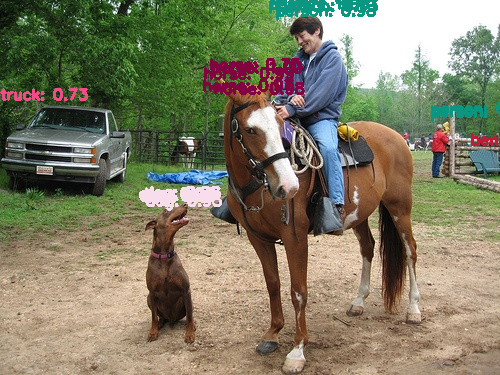

In [17]:
img_2 = img.copy()

for i in range(len(boxes)):
  (x, y) = (boxes[i][0], boxes[i][1])
  (w, h) = (boxes[i][2], boxes[i][3])
  color=[int(c) for c in colors[classIDs[i]]]
  text = "{}: {:.2f}".format(classes[classIDs[i]], confidences[i])
  cv2.putText(img_2, text, (x, y-5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)


cv2_imshow(img_2)

# Non max supression

In [18]:
indices = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)
print(indices)

[13  2  7 15 14  4]


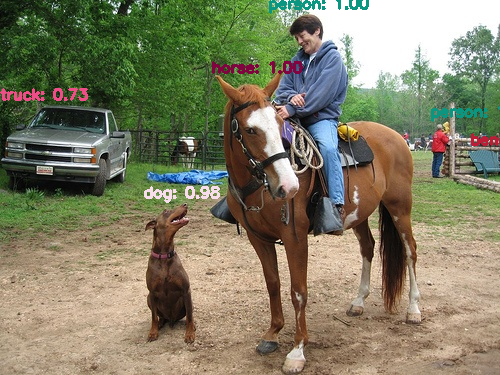

In [19]:
img_2 = img.copy()

for i in indices.flatten():
  (x, y) = (boxes[i][0], boxes[i][1])
  (w, h) = (boxes[i][2], boxes[i][3])
  color=[int(c) for c in colors[classIDs[i]]]
  text = "{}: {:.2f}".format(classes[classIDs[i]], confidences[i])
  cv2.putText(img_2, text, (x, y-5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)


cv2_imshow(img_2)